In [1]:
import pandas as pd
import numpy as np
import numpy_financial as npf
from datetime import date
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Create a function for calculating NPV
def Npv(r, cf):
    return npf.npv(r*0.01, cf)

In [3]:
cash_flows = [-1000, 73.75, 73.75, 73.75, 73.75, 1073.75]
#cash_flows = [-145, 100, 100, 100, 100, -275]
#cash_flows = [-110, 121]
#cash_flows = [-120000, 30000, 60000, 50000, 40000, 180000]
#cash_flows = [-500, 30,50,-10,20,-5]
#cash_flows = [-500, 600,300,300,200,-1000]
cash_flows

[-1000, 73.75, 73.75, 73.75, 73.75, 1073.75]

In [4]:
print("NPV: ${}".format(round(Npv(10, cash_flows),3)))

NPV: $-99.508


In [5]:
# Create a data frame with a range of discount rates
dfi = pd.DataFrame(data=list(range(0,70,1)) , columns=['discount_rate'])

# Calcualte NPVs for all discount rates
dfi['NPV'] = dfi.apply(lambda x: Npv(x['discount_rate'], cash_flows), axis=1)
dfi.set_index('discount_rate', inplace=True)
print(dfi.head())

                      NPV
discount_rate            
0              368.750000
1              309.406242
2              253.348449
3              200.362189
4              150.249004


In [6]:
# Calculate IRR
irr = round(npf.irr(cash_flows)*100, 5)
irr

7.375

Based on the IRR formula, IRR is 7.375 percent


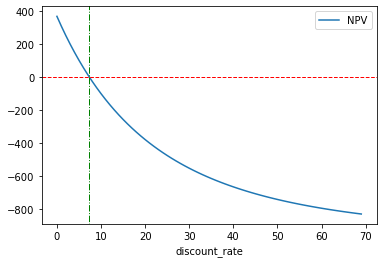

In [7]:
ax = dfi.plot()
ax.axhline(y=0,   xmin=dfi.index.min(),  xmax=dfi.index.max(), color='r', linestyle='--', lw=1)
ax.axvline(x=irr, ymin=dfi['NPV'].min(), ymax=dfi['NPV'].max(),color='g', linestyle='-.', lw=1)
print("Based on the IRR formula, IRR is {} percent".format(irr))

In [8]:
print(dfi.head())
print(dfi.tail())

                      NPV
discount_rate            
0              368.750000
1              309.406242
2              253.348449
3              200.362189
4              150.249004
                      NPV
discount_rate            
65            -814.048501
66            -817.788516
67            -821.412649
68            -824.925375
69            -828.330964


In [9]:
print("Based on the data frame, IRR is about {} percent".format(abs(dfi).idxmin()[0]))

Based on the data frame, IRR is about 7 percent
